In [1]:
from synthcity_addons import generators
import openml
from sklearn.preprocessing import QuantileTransformer, StandardScaler
from synthcity_addons import GenericDataLoader
from utils import TabrQuantileTransformer
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

#normalization = "tabr_quantile"
normalization = "standard"
task_id = 361073
task = openml.tasks.get_task(task_id)
dataset = task.get_dataset()
dataset_name = dataset.name
# kwargs are the hyperparameters
hp_dic = {}
hp_dic.update({"strict": False})
print("hp_dic", hp_dic)
hp_dic_original = hp_dic.copy()
hp_str = "_".join([f"{k}_{v}" for k, v in hp_dic.items()]) # before it's modified by synthcity
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
# add target to X
X["target"] = y
# restrict X to 20K random samples
if X.shape[0] > 20000:
    X = X.sample(20000, random_state=42)

# restrict to 30 columns
#X = X.iloc[:, -30:]
X = X.iloc[:, :2]

# make a random 2d numerical + categorical
#X = pd.DataFrame(np.random.rand(3000, 2), columns=["x", "y"])
# make the second column categorical (ordinal 0, 1, 2)
#X["y"] = pd.cut(X["y"], bins=[0, 0.5, 0.8, 1], labels=[0, 1, 2])
#X["y"] = pd.cut(X["y"], bins=3, labels=[0, 1, 2])

# moon dataset
X, y = make_moons(n_samples=3000, noise=0.1)
X = pd.DataFrame(X, columns=["x", "y"])

print(X.columns)
if normalization == "quantile":
    X = QuantileTransformer(output_distribution="normal", random_state=42).set_output(transform="pandas").fit_transform(X)
elif normalization == "standard":
    X = StandardScaler().set_output(transform="pandas").fit_transform(X)
elif normalization == "tabr_quantile":
    X_ = TabrQuantileTransformer().fit_transform(X.to_numpy())
    # transform back to pandas
    X = pd.DataFrame(X_, columns=X.columns)

# add target
X["target"] = y
print(X)

print(X)
# take 1024 random rows from X
indices = np.random.choice(X.index, 1024, replace=False)
X_ref = X.loc[indices]
X = X.drop(index=indices)

loader = GenericDataLoader(X, target_column="target")
loader_ref = GenericDataLoader(X_ref, target_column="target")

print("Loaded")

task_type = "classification"
synthetic_size = 512

[2024-07-16T12:49:56.781249+0200][114132][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
INFO:datasets:PyTorch version 1.13.1 available.
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp9rh5xcwl
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp9rh5xcwl/_remote_module_non_scriptable.py
INFO:openml.config:No config file found at /home/soda/lgrinszt/.config/openml/config, using default configuration.
INFO:openml.datasets.dataset:pickle load data pol


hp_dic {'strict': False}
Index(['x', 'y'], dtype='object')
             x         y  target
0     0.449502  0.092825       0
1     0.547848 -1.540037       1
2     0.212694  1.214081       0
3    -1.700143 -0.406862       0
4    -0.450279  0.290917       1
...        ...       ...     ...
2995  1.930515 -0.174891       1
2996  0.880566 -1.378234       1
2997 -0.321478 -0.497833       1
2998  0.183090  1.068569       0
2999 -0.404316  0.140640       1

[3000 rows x 3 columns]
             x         y  target
0     0.449502  0.092825       0
1     0.547848 -1.540037       1
2     0.212694  1.214081       0
3    -1.700143 -0.406862       0
4    -0.450279  0.290917       1
...        ...       ...     ...
2995  1.930515 -0.174891       1
2996  0.880566 -1.378234       1
2997 -0.321478 -0.497833       1
2998  0.183090  1.068569       0
2999 -0.404316  0.140640       1

[3000 rows x 3 columns]
Loaded


In [2]:
# y_for_svm = X["target"]
# X_for_svm = X.drop(columns=["target"])
# svm = SVC(kernel='rbf', gamma='scale')
# svm.fit(X_for_svm, y_for_svm)

# X_false_svm = svm.support_vectors_
# y_false_svm = svm.predict(X_false_svm)

from synthcity.plugins import Plugins

plugin = Plugins().get("tabpfn_points_performance", device="cpu", n_batches=3)

plugin.fit(X)


[2024-07-16T12:46:51.769509+0200][1334257][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


encoders None


 33%|███▎      | 1/3 [00:12<00:24, 12.19s/it]

Batch 0 loss: 0.6932072639465332


100%|██████████| 3/3 [00:30<00:00, 10.03s/it]


In [3]:
X.shape

(1976, 3)

In [4]:

X_false = plugin.sample(20)

In [6]:
X_false

array([[ 0.2669231 , -0.01327537],
       [-0.08407812, -0.20066656],
       [ 0.10312356, -0.09717841],
       [ 0.14857963,  0.19761181],
       [ 0.0391903 , -0.14615849],
       [-0.4134788 ,  0.00300568],
       [-0.19434549,  0.43251818],
       [ 0.5130377 , -0.58016825],
       [-0.0200501 ,  0.04964359],
       [ 0.23993067,  0.45219168],
       [-0.05936504,  0.16766815],
       [-0.1772236 ,  0.071939  ],
       [-0.02467143,  0.16531876],
       [-0.08126773, -0.05901717],
       [ 0.15212198,  0.17975843],
       [ 0.02347765,  0.01748692],
       [ 0.00555519,  0.01858857],
       [ 0.09424446,  0.01476423],
       [-0.16269974, -0.07944347],
       [-0.10653939, -0.12194865]], dtype=float32)

In [7]:
plugin.get_n_points_to_create()

33

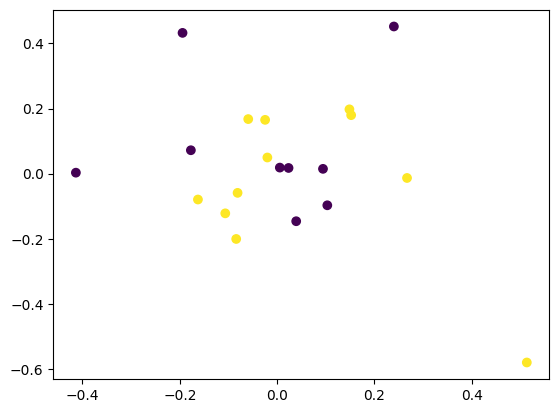

In [5]:
import matplotlib.pyplot as plt

X_false = plugin.sample(20)
y_false = X_false[:, -1]
X_false = X_false[:, :-1]

plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, cmap="viridis")
plt.show()

In [16]:
# plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color="blue", label="True", alpha=0.5)
# plt.show()

In [8]:
from synthcity.plugins import Plugins
hp_dic = {}
hp_dic["n_batches"] = 100
hp_dic["n_points_to_create"] = 50
hp_dic["n_true_in_train_performance"] = 0
hp_dic["n_permutations"] = 5
hp_dic["n_ensembles"] = 5
hp_dic["initialization_strategy"] =  Plugins().get("gaussian_noise", strict=False)
hp_dic["preprocessing"] = "none"
hp_dic["noise_std"] = 0.1
hp_dic["lr"] = 0.01
hp_dic["n_test_from_false_train"] = 256
hp_dic["store_intermediate_data"] = True
#hp_dic["use_wasserstein"] = True
hp_dic["store_animation_path"] = "animation_3.mp4"
hp_dic["strict"] = False
hp_dic["loss"] = "performance"
hp_dic["opposite_loss"] = False

plugin = Plugins().get("tabpfn_points_performance", **hp_dic)
#plugin = Plugins().get("ddpm")

[2024-07-16T12:53:03.051205+0200][114132][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2024-07-16T12:53:03.058804+0200][114132][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


encoders None
encoders None
fit
sample 25 25
encoders None
fit
sample 25 25


  1%|          | 1/100 [00:01<02:43,  1.65s/it]

Batch 0 loss: 0.6931469440460205


  7%|▋         | 7/100 [00:05<01:03,  1.48it/s]

 11%|█         | 11/100 [00:08<00:57,  1.54it/s]

Batch 10 loss: 0.6527729034423828


 21%|██        | 21/100 [00:14<00:50,  1.55it/s]

Batch 20 loss: 0.5904300212860107


 31%|███       | 31/100 [00:21<00:44,  1.54it/s]

Batch 30 loss: 0.5189451575279236


 41%|████      | 41/100 [00:27<00:38,  1.55it/s]

Batch 40 loss: 0.4469152092933655


 51%|█████     | 51/100 [00:33<00:31,  1.55it/s]

Batch 50 loss: 0.3686673641204834


 61%|██████    | 61/100 [00:40<00:25,  1.54it/s]

Batch 60 loss: 0.25654855370521545


 71%|███████   | 71/100 [00:46<00:18,  1.54it/s]

Batch 70 loss: 0.1401454508304596


 81%|████████  | 81/100 [00:53<00:12,  1.54it/s]

Batch 80 loss: 0.07835227251052856


 91%|█████████ | 91/100 [00:59<00:05,  1.54it/s]

Batch 90 loss: 0.05166332796216011


100%|██████████| 100/100 [01:05<00:00,  1.52it/s]
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 1200x600 -pix_fmt rgba -r 1.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation_3.mp4


animation done


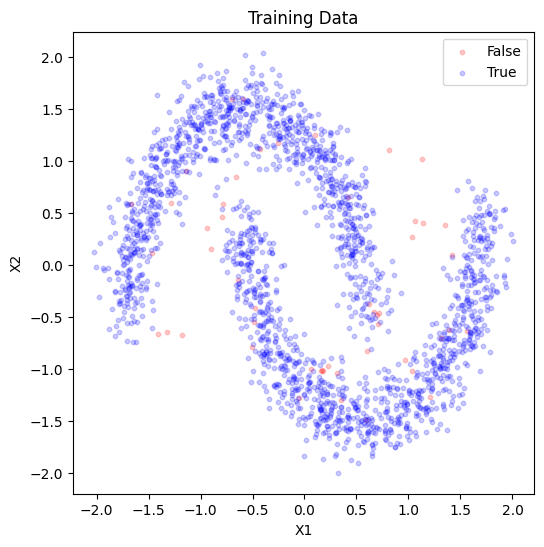

In [9]:
plugin.fit(X)

X_false (50, 2)
Accuracy of the classifier trained on synthetic data and tested on real data: 0.9939271255060729


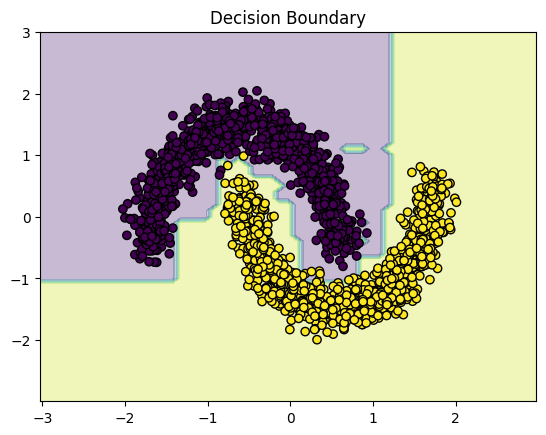

In [10]:
import matplotlib.pyplot as plt
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_false_tabpfn = plugin.generate(50).numpy()
X_false, y_false = X_false_tabpfn[:, :-1], X_false_tabpfn[:, -1]
#support_vectors = svm.support_vectors_
#X_false = support_vectors
#y_false = svm.predict(support_vectors)

print("X_false", X_false.shape)
# generate at random instead
#X_false = np.random.randn(512, 2)
#y_false = np.random.randint(0, 2, 512)
y_true = X["target"].to_numpy()
X_true = X.drop(columns=["target"]).to_numpy()

# separate X_true and y_true into train and test
#X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X_true, y_true, test_size=0.85, random_state=42)
#print(X_true_train.shape)

# add false data to X_true_train and y_true_train
#X_true_train = np.concatenate((X_true_train, X_false), axis=0)
#y_true_train = np.concatenate((y_true_train, y_false), axis=0)#

# plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, cmap="viridis")
# plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, cmap="viridis")
# plt.show()

#model = TabPFNClassifier()
model = RandomForestClassifier()
#model = TabPFNClassifier(device="cpu", N_ensemble_configurations=1,
#                                              no_preprocess_mode=True, no_grad=True, normalize=False)
#model.fit(X_true_train, y_true_train)
#y_pred = model.predict(X_true_test)
model.fit(X_false, y_false)
y_pred = model.predict(X_true)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the classifier trained on synthetic data and tested on real data: {accuracy}")

# show the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_true[:, 0].min() - 1, X_true[:, 0].max() + 1
y_min, y_max = X_true[:, 1].min() - 1, X_true[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, edgecolor='k', cmap="viridis")
#plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
#plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, edgecolor='k', cmap="viridis")
plt.title("Decision Boundary")
plt.show()




Accuracy of the classifier trained on synthetic data and tested on real data: 0.9994939271255061


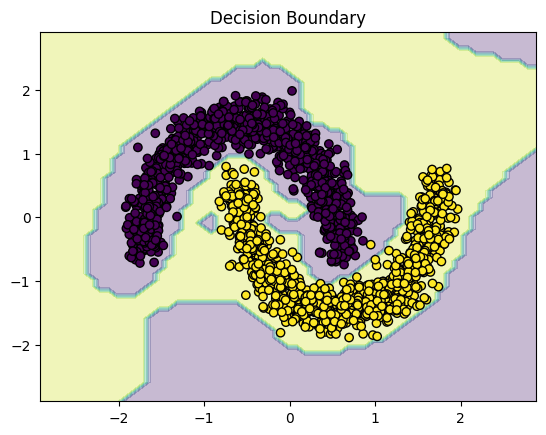

In [13]:
import matplotlib.pyplot as plt
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
X_false_tabpfn = plugin.generate(512).numpy()
X_false, y_false = X_false_tabpfn[:, :-1], X_false_tabpfn[:, -1]
# generate at random instead
#X_false = np.random.randn(512, 2)
#y_false = np.random.randint(0, 2, 512)
y_true = X["target"].to_numpy()
X_true = X.drop(columns=["target"]).to_numpy()

# plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, cmap="viridis")
# plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, cmap="viridis")
# plt.show()

#model = TabPFNClassifier()
#model = RandomForestClassifier()
model = TabPFNClassifier(device="cpu", N_ensemble_configurations=1,
                                              no_preprocess_mode=True, no_grad=True, normalize=False)
model.fit(X_false, y_false)
y_pred = model.predict(X_true)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the classifier trained on synthetic data and tested on real data: {accuracy}")

# show the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_true[:, 0].min() - 1, X_true[:, 0].max() + 1
y_min, y_max = X_true[:, 1].min() - 1, X_true[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, edgecolor='k', cmap="viridis")
#plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, edgecolor='k', cmap="viridis")
plt.title("Decision Boundary")
plt.show()




Accuracy of the classifier trained on synthetic data and tested on real data: 0.9949392712550608


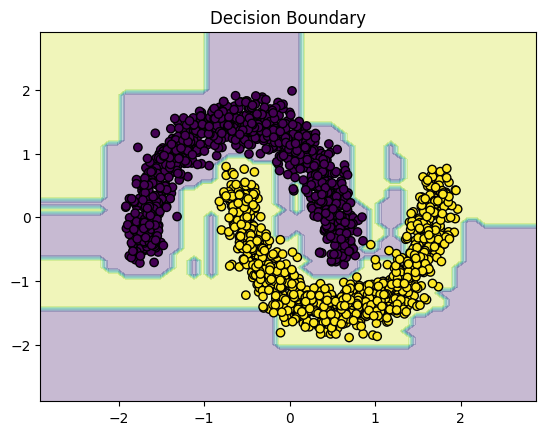

In [14]:
import matplotlib.pyplot as plt
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
X_false_tabpfn = plugin.generate(512).numpy()
X_false, y_false = X_false_tabpfn[:, :-1], X_false_tabpfn[:, -1]
# generate at random instead
#X_false = np.random.randn(512, 2)
#y_false = np.random.randint(0, 2, 512)
y_true = X["target"].to_numpy()
X_true = X.drop(columns=["target"]).to_numpy()

# plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, cmap="viridis")
# plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, cmap="viridis")
# plt.show()

#model = TabPFNClassifier()
model = RandomForestClassifier()
#model = TabPFNClassifier(device="cpu", N_ensemble_configurations=1,
#                                              no_preprocess_mode=True, no_grad=True, normalize=False)
model.fit(X_false, y_false)
y_pred = model.predict(X_true)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the classifier trained on synthetic data and tested on real data: {accuracy}")

# show the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_true[:, 0].min() - 1, X_true[:, 0].max() + 1
y_min, y_max = X_true[:, 1].min() - 1, X_true[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, edgecolor='k', cmap="viridis")
#plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, edgecolor='k', cmap="viridis")
plt.title("Decision Boundary")
plt.show()




# 30 points, starting from gaussian noise

Accuracy of the classifier trained on synthetic data and tested on real data: 0.9984817813765182


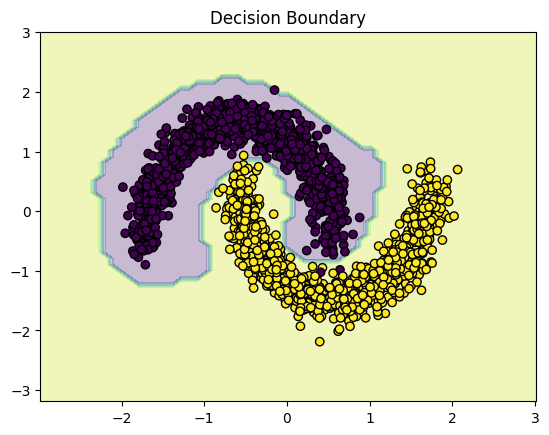

In [14]:
import matplotlib.pyplot as plt
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
X_false_tabpfn = plugin.generate(30).numpy()
X_false, y_false = X_false_tabpfn[:, :-1], X_false_tabpfn[:, -1]
# generate at random instead
#X_false = np.random.randn(512, 2)
#y_false = np.random.randint(0, 2, 512)
y_true = X["target"].to_numpy()
X_true = X.drop(columns=["target"]).to_numpy()

# plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, cmap="viridis")
# plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, cmap="viridis")
# plt.show()

#model = TabPFNClassifier()
#model = RandomForestClassifier()
model = TabPFNClassifier(device="cpu", N_ensemble_configurations=1,
                                               no_preprocess_mode=True, no_grad=True, normalize=False)
model.fit(X_false, y_false)
y_pred = model.predict(X_true)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the classifier trained on synthetic data and tested on real data: {accuracy}")

# show the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_true[:, 0].min() - 1, X_true[:, 0].max() + 1
y_min, y_max = X_true[:, 1].min() - 1, X_true[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, edgecolor='k', cmap="viridis")
#plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, edgecolor='k', cmap="viridis")
plt.title("Decision Boundary")
plt.show()




Accuracy of the classifier trained on synthetic data and tested on real data: 0.8780364372469636


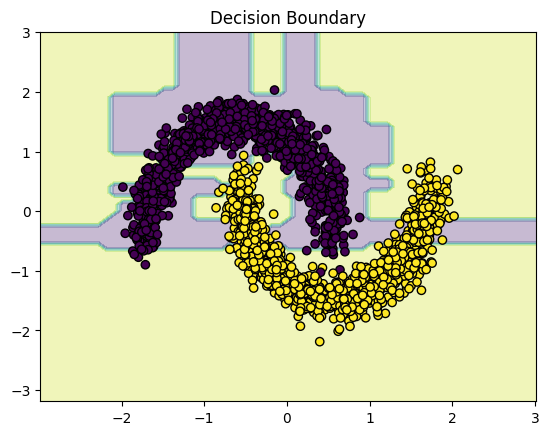

In [12]:
import matplotlib.pyplot as plt
from tabpfn import TabPFNClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
X_false_tabpfn = plugin.generate(30).numpy()
X_false, y_false = X_false_tabpfn[:, :-1], X_false_tabpfn[:, -1]
# generate at random instead
#X_false = np.random.randn(512, 2)
#y_false = np.random.randint(0, 2, 512)
y_true = X["target"].to_numpy()
X_true = X.drop(columns=["target"]).to_numpy()

# plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, cmap="viridis")
# plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, cmap="viridis")
# plt.show()

#model = TabPFNClassifier()
model = RandomForestClassifier()
# model = TabPFNClassifier(device="cpu", N_ensemble_configurations=1,
#                                               no_preprocess_mode=True, no_grad=True, normalize=False)
model.fit(X_false, y_false)
y_pred = model.predict(X_true)
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy of the classifier trained on synthetic data and tested on real data: {accuracy}")

# show the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay

# Create a mesh grid for plotting decision boundary
x_min, x_max = X_true[:, 0].min() - 1, X_true[:, 0].max() + 1
y_min, y_max = X_true[:, 1].min() - 1, X_true[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_true[:, 0], X_true[:, 1], c=y_true, edgecolor='k', cmap="viridis")
#plt.scatter(X_false[:, 0], X_false[:, 1], c=y_false, edgecolor='k', cmap="viridis")
plt.title("Decision Boundary")
plt.show()




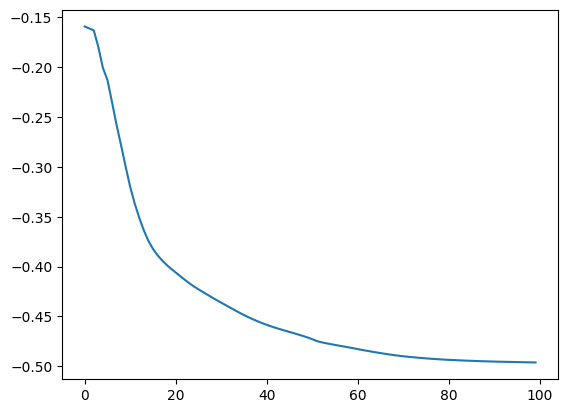

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.log10(plugin.loss_list))

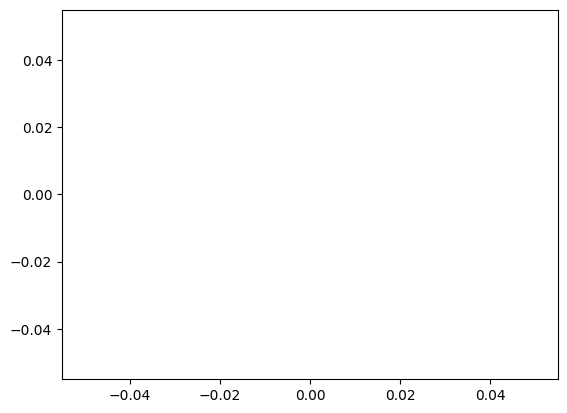

In [7]:
plt.plot(plugin.accuracy_list)

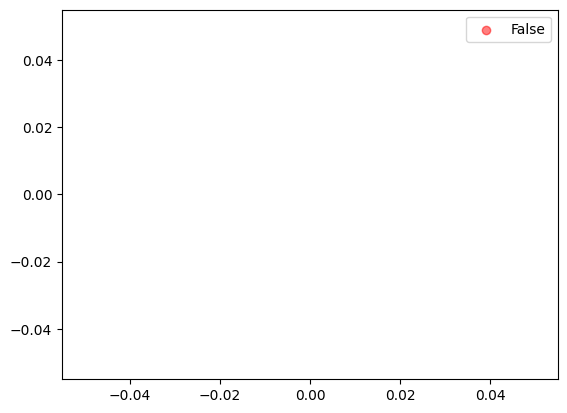

In [8]:
X_false_init = plugin.all_X_false_train[-1]
plt.scatter(X_false_init[:, 0], X_false_init[:, 1], color="red", label="False", alpha=0.5)
#plt.scatter(X.iloc[:, 0], X.iloc[:, 1], color="blue", label="True", alpha=0.5)
plt.legend()
plt.show()

In [6]:
X_false_tabpfn = plugin.generate(512).numpy()
X_false, y_false = X_false_tabpfn[:, :-1], X_false_tabpfn[:, -1]
X_true, y_true = X.unpack(as_numpy=True)

AttributeError: 'DataFrame' object has no attribute 'unpack'

In [17]:
import ot
M = ot.dist(X.to_numpy(), X_false_tabpfn, metric='euclidean')
a = np.ones((X.shape[0],)) / X.shape[0]
b = np.ones((X_false_tabpfn.shape[0],)) / X_false_tabpfn.shape[0]
reg = 1e-1  # Regularization parameter for Sinkhorn algorithm
loss = ot.sinkhorn2(a, b, M, reg)
# compute another way
#loss = ot.emd2(a, b, M)
print("loss", loss)

loss 8.134153320532757e-73


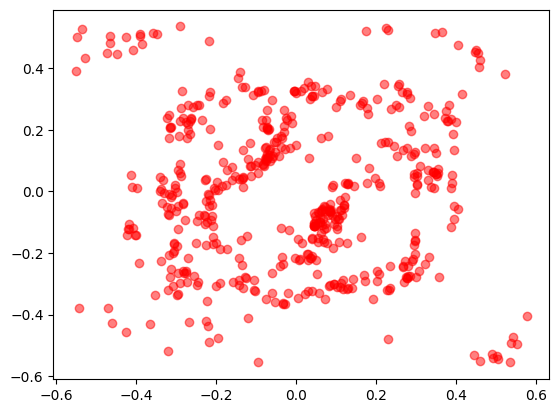

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X_false_tabpfn[:, 0], X_false_tabpfn[:, 1], color="red", label="False", alpha=0.5)
plt.show()

In [29]:
# find the unique values in the second column of X_false_tabpfn
unique_values = np.unique(X.iloc[:, 1])
print(unique_values)
# compute 2 thresholds between the 3 unique values
thresholds = np.percentile(unique_values, [25, 75])
print(thresholds)
# compute the number of unique values in X_false_tabpfn that are in the three classes
print(np.sum((X_false_tabpfn[:, 1] < thresholds[0])))
print(np.sum((X_false_tabpfn[:, 1] > thresholds[0]) & (X_false_tabpfn[:, 1] < thresholds[1])))
print(np.sum((X_false_tabpfn[:, 1] > thresholds[1])))
# same for X
print(np.sum((X.iloc[:, 1] < thresholds[0])))
print(np.sum((X.iloc[:, 1] > thresholds[0]) & (X.iloc[:, 1] < thresholds[1])))
print(np.sum((X.iloc[:, 1] > thresholds[1])))


[-2.0050054  -1.98613908 -1.95884429 ...  1.87737903  1.91719891
  2.07694524]
[-0.89042332  0.87796696]
127
261
124
494
988
494


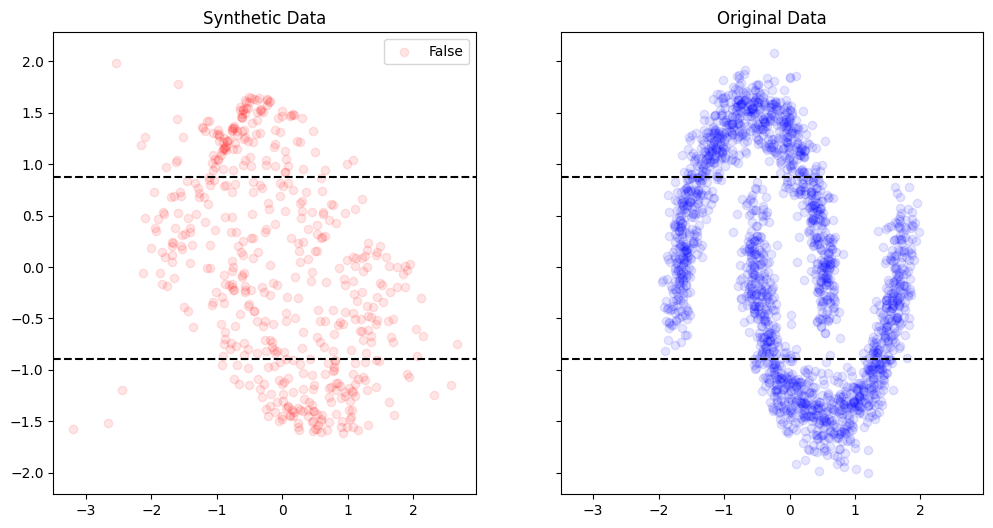

In [30]:
import matplotlib.pyplot as plt
dims = 0, 1
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))

ax1.scatter(X_false_tabpfn[:, dims[0]], X_false_tabpfn[:, dims[1]], color="red", label="False", alpha=0.1)
# horizontal lines at the thresholds
ax1.axhline(y=thresholds[0], color="black", linestyle="--")
ax1.axhline(y=thresholds[1], color="black", linestyle="--")
ax1.set_title("Synthetic Data")
ax1.legend()

ax2.scatter(X.to_numpy()[:, dims[0]], X.to_numpy()[:, dims[1]], color="blue", alpha=0.1)
ax2.axhline(y=thresholds[0], color="black", linestyle="--")
ax2.axhline(y=thresholds[1], color="black", linestyle="--")
ax2.set_title("Original Data")

plt.show()


Model accuracy: 0.5219512195121951


(array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 3., 1., 0.,
         2., 2., 1., 1., 2., 0., 1., 1., 2., 1., 3., 1., 0., 3., 2., 2.,
         4., 2., 2., 6., 2., 7., 4., 6., 1., 3., 2., 1., 3., 2., 4., 4.,
         5., 9., 4., 5., 4., 2., 5., 7., 6., 5., 6., 3., 5., 4., 5., 5.,
         5., 5., 7., 8., 4., 3., 0., 0., 3., 0., 5., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 5., 0., 3., 0., 0., 3., 4.,
         8., 7., 5., 5., 5., 5., 4., 5., 3., 6., 5., 6., 7., 5., 2., 4.,
         5., 4., 9., 5., 4., 4., 2., 3., 1., 2., 3., 1., 6., 4., 7., 2.,
         6., 2., 2., 4., 2., 2., 3., 0., 1., 3., 1., 2., 1., 1., 0., 2.,
         1., 1., 2., 2., 0., 1., 3., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 1.]]),
 array([0.47389784, 0.47441989, 0.47494194, 0.47546399, 0.475986  ,
  

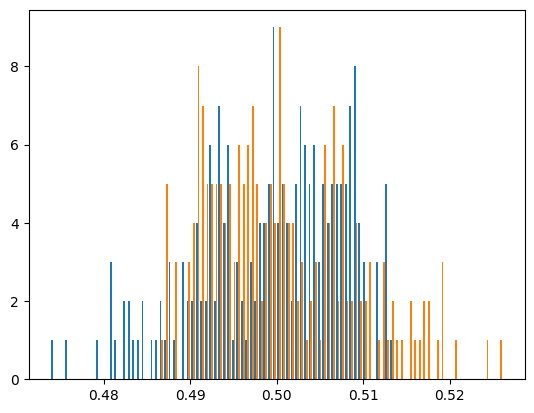

In [44]:
from tabpfn import TabPFNClassifier

model = TabPFNClassifier(normalize=False, no_preprocess_mode=True)
#model = TabPFNClassifier()

# Train the model to see if it can discriminate between true and false data
y_true = np.ones(X_false_tabpfn.shape[0])
y_false = np.zeros(X_false_tabpfn.shape[0])

X_combined = np.vstack((X.to_numpy()[:X_false_tabpfn.shape[0]], X_false_tabpfn))
y_combined = np.hstack((y_true, y_false))

# train test split
from sklearn.model_selection import train_test_split

# Split the combined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# show the proba distribution
probs = model.predict_proba(X_test)
plt.hist(probs, bins=100)



NORMALIZING
NORMALIZING
Model accuracy: 0.5024390243902439
NORMALIZING
NORMALIZING


(array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  1.,  1.,  2.,  0.,  1.,  1.,  0.,  0.,  1.,  4.,  1.,
          0.,  2.,  0.,  0.,  1.,  2.,  3.,  1.,  2.,  5.,  4.,  2.,  7.,
          3.,  8.,  9.,  7.,  3.,  7.,  3.,  4.,  5., 10.,  2.,  3., 10.,
         12.,  7.,  1.,  1.,  3.,  5.,  4.,  6.,  5.,  1.,  1.,  1.,  0.,
          1.,  1.,  4.,  4.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  6.,
          6.,  2.,  0.,  0.,  1.,  2.,  2.,  1.,  2.],
        [ 2.,  1.,  2.,  2.,  1.,  0.,  0.,  2.,  6.,  6.,  1.,  1.,  1.,
          0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
          1.,  1.,  0.,  1.,  0.,  4.,  4.,  1.,  1.,  0.,  1.,  1.,  1.,
          5.,  6.,  4.,  5.,  3.,  1.,  1.,  7., 12., 10.,  3.,  2., 10.,
          5.,  4.,  3.,  7.,  3.,  7.,  9.,  8.,  3.,  7.,  2.,  4.,  5.,
          2.,  1.,  3.,  2.,  1.,  0.,  0.,  2.,  0.,  1.

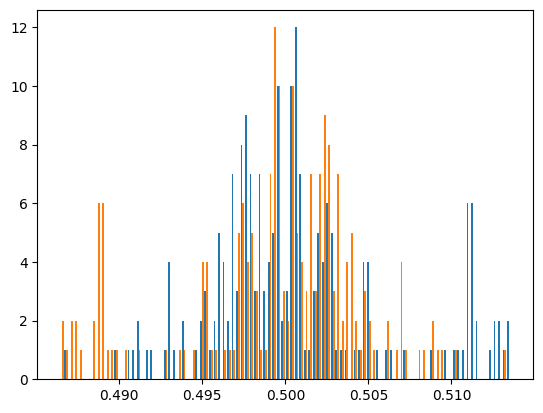

In [33]:
from tabpfn import TabPFNClassifier

#model = TabPFNClassifier(normalize=False, no_preprocess_mode=True)
model = TabPFNClassifier()

# Train the model to see if it can discriminate between true and false data
y_true = np.ones(512)
y_false = np.zeros(512)

X_combined = np.vstack((X.to_numpy()[:512], X_ref.to_numpy()[:512]))
y_combined = np.hstack((y_true, y_false))

# train test split
from sklearn.model_selection import train_test_split

# Split the combined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy}")

# show the proba distribution
probs = model.predict_proba(X_test)
plt.hist(probs, bins=100)



NameError: name 'X_false' is not defined

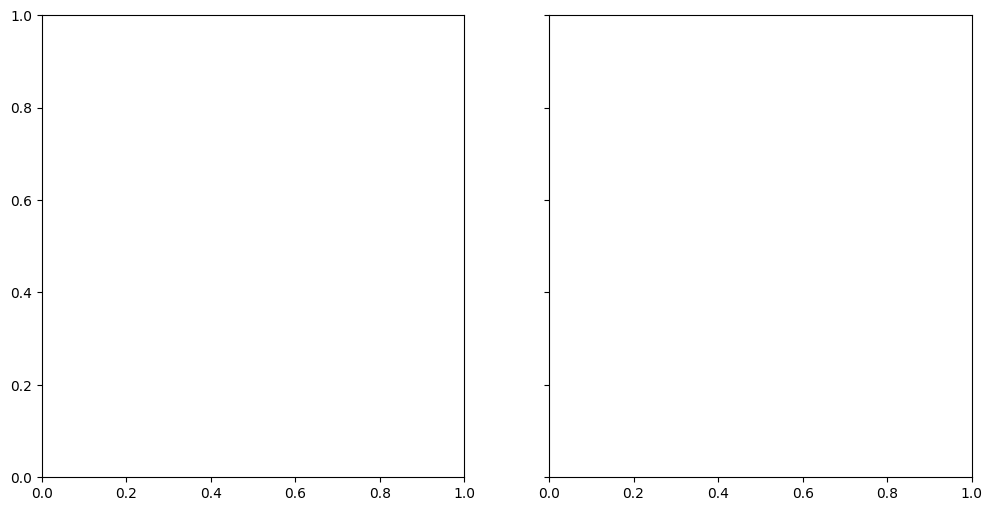

In [23]:
import matplotlib.pyplot as plt
dims = 0, 1
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 6))

ax1.scatter(X_false[:, dims[0]], X_false[:, dims[1]], color="red", label="False", alpha=0.5)
ax1.set_title("Synthetic Data")
ax1.legend()

ax2.scatter(X.to_numpy()[:, dims[0]], X.to_numpy()[:, dims[1]], color="blue", alpha=0.1)
ax2.set_title("Original Data")

plt.show()


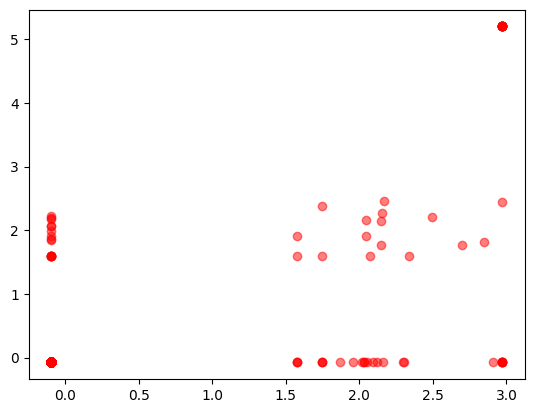

In [40]:
plt.scatter(X_false[:, dims[0]], X_false[:, dims[1]], color="red", label="False", alpha=0.5)

(array([1.3013e+04, 0.0000e+00, 0.0000e+00, 6.5500e+02, 2.3000e+02,
        7.7000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-0.08694499,  0.44168327,  0.97031153,  1.49893978,  2.02756804,
         2.5561963 ,  3.08482455,  3.61345281,  4.14208107,  4.67070933,
         5.19933758]),
 <BarContainer object of 10 artists>)

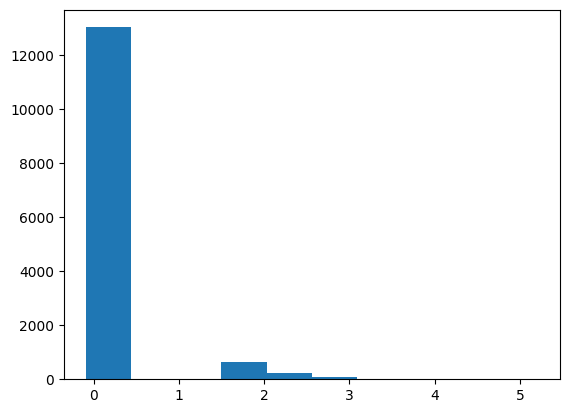

In [28]:
plt.hist(X.to_numpy()[:, dims[0]])

In [19]:
num_unique_rows = len(np.unique(plugin.X_false_train.cpu().detach().numpy(), axis=0))
print(f"Number of unique rows in X_false: {num_unique_rows}")

Number of unique rows in X_false: 512


In [1]:
from synthcity_addons import generators
import numpy as np
from synthcity_addons import GenericDataLoader, Plugins

# change seed
np.random.seed(20)

X = np.random.rand(10, 2)
X_ref = np.random.rand(10, 2)

loader = GenericDataLoader(X)
loader_ref = GenericDataLoader(X_ref)

syn_model = Plugins().get("oracle", strict=False)
syn_model.fit(loader, loader_ref)

false_data = syn_model.generate(14)
# show the number of duplicates in false_data
s = 0
for i in range(false_data.numpy().shape[0]):
    for j in range(i+1, false_data.numpy().shape[0]):
        if np.all(false_data.numpy()[i] == false_data.numpy()[j]):
            s += 1
print(s)

[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


[2024-07-05T16:36:17.361789+0200][3623684][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
INFO:datasets:PyTorch version 1.13.1 available.
INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpaiq9s4ko
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpaiq9s4ko/_remote_module_non_scriptable.py
[2024-07-05T16:36:20.060640+0200][3623684][CRITICAL] module disabled: /data/parietal/store/work/lgrinszt/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


encoders None
4


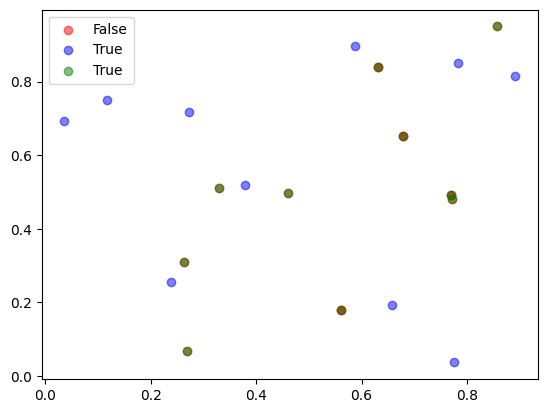

In [2]:
import matplotlib.pyplot as plt

plt.scatter(false_data.numpy()[:, 0], false_data.numpy()[:, 1], color="red", label="False", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], color="blue", label="True", alpha=0.5)
plt.scatter(X_ref[:, 0], X_ref[:, 1], color="green", label="True", alpha=0.5)
plt.legend()
plt.show()

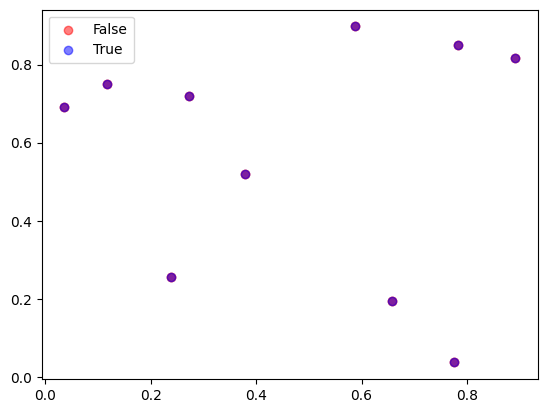

In [37]:
import matplotlib.pyplot as plt

plt.scatter(false_data.numpy()[:, 0], false_data.numpy()[:, 1], color="red", label="False", alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], color="blue", label="True", alpha=0.5)
plt.legend()
plt.show()